Jian Wang 204357764   
STAT C283 2019 Spring   
project 1  

# (a,b) the industries and the stocks are:

In [4]:
b="Gold, Technology, Real estate, Energy, health care"
a="^GSPC,KL,RGLD,AU,OR,SSRM,SA,GOOG,FB,AMZN,AAPL,MSFT,INTC,SPG,CCI,PLD,PSA-PH,PSA,EQR,EC,XOM,CVX,PTR,BP,TOT,JNJ,UNH,PFE,MRK,NVS,ABT"                      

# (c) the mean return and co-variance :

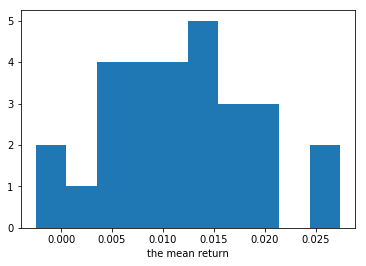

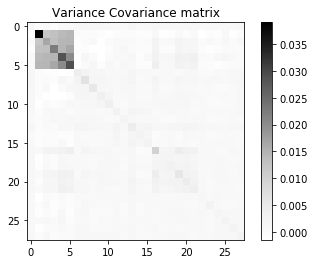

In [36]:
plt.hist(p.mean_return)
plt.xlabel("the mean return")
plt.show()
plt.imshow(p.variance_covariance_matrix )
plt.title("Variance Covariance matrix")
plt.colorbar()
plt.show()
#p.plot_variance_covariance_matrix()

# (d,e,f) 31 assets on the return-risk space

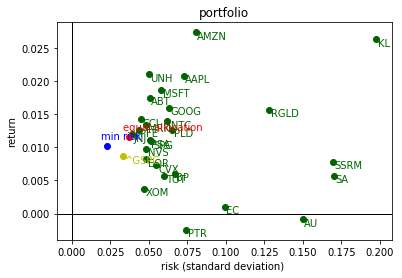

In [43]:
p = Portfolio("stockData_proj_1.csv")
p.plot_stocks( )

# (g,h)  Two methods of efficient fontier and Rf tangent line

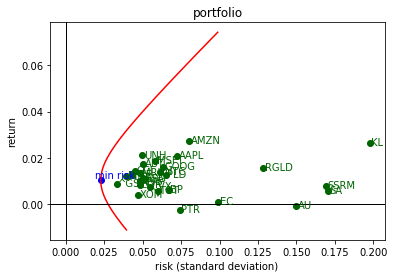

In [47]:
p = Portfolio("stockData_proj_1.csv")
p.plot_stocks_hyperbola()

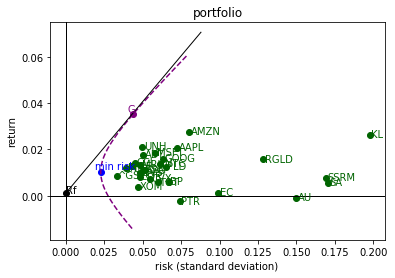

In [48]:
p.plot_stocks_hyperbola_via_tangent( 0.001 )

In [160]:
import pandas as pd 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# the first stock in the csv file must be the market

class Single_Index_Model:
    def __init__( self , csvfilename ):
        self.p = Portfolio( csvfilename )
        
    

In [165]:
#pd.read_csv("stockData_proj_1.csv")

In [42]:
import pandas as pd 
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

class Portfolio:
    def __init__( self , csvfilename ):
        a=pd.read_csv(csvfilename) 
        
        self.stocknamelist=a.columns.tolist()[2:]
        
        m=a[self.stocknamelist].values
        
        self.T=m.shape[0] 
        self.N=m.shape[1] # numbers of stocks
        
        self.r =np.array(  ( m[1:self.T,:] - m[0:(self.T-1),:])  / m[0:(self.T-1),:]   )
    
        self.mean_return = np.mean( self.r , axis=0 )
        self.variance_covariance_matrix = np.cov( self.r , rowvar=False )
        
    def get_minimum_risk_portfolio( self ):
        allone=np.array( [1]*self.N )  # 1_vector
        matrix_inv = inv( self.variance_covariance_matrix )
        x = np.matmul( matrix_inv , allone )/ np.matmul( allone, np.matmul( matrix_inv , allone )   )
        return x
    
    def get_ABCD( self ):
        # A B C D are paremeters of the efficiency frontier Hyperbola
        # see paper 
        # AN ANALYTIC DERIVATION OF THE EFFICIENT PORTFOLIO FRONTIER
        # by Robert C. Merton, 1972
        allone=np.array( [1]*self.N )
        matrix_inv = inv( self.variance_covariance_matrix )

        A = np.matmul( self.mean_return , np.matmul( matrix_inv , allone  )  )
        B = np.matmul( self.mean_return , np.matmul( matrix_inv , self.mean_return     )  )
        C = np.matmul( allone, np.matmul( matrix_inv , allone  )  )
        D = B * C - A * A
        return A,B,C,D                     
                             
    
    def get_targent_portfolio( self , Rf ):
        R1 = self.mean_return - np.array( [1]*self.N) * Rf
        z = np.matmul( inv( self.variance_covariance_matrix ), R1 )
        x = z/sum(z)
        return x
    
    def calculate_return_risk( self , x ):
        r = np.sqrt( np.matmul( x, np.matmul( self.variance_covariance_matrix ,x ) ) )
        risk = np.matmul( self.mean_return , x )
        return r , risk
    
    def calculate_two_portfolio( self, x1 ,  lam , x2 ):
        return x1*lam + (1-lam)*x2
    
    
    def plot_variance_covariance_matrix( self ):
        plt.imshow( self.variance_covariance_matrix )
        plt.set_cmap('Greys')
        plt.show()
        
    def plot_stocks( self ):
        
        # (1) plot the (risk,return) for all the stocks
        xp = np.sqrt( np.diag( self.variance_covariance_matrix ))
        yp = self.mean_return
        plt.plot( xp[1:self.N] , yp[1:self.N] ,'o',color='darkgreen' )
        for i in range( 1,self.N ):
            plt.annotate( self.stocknamelist[i], (xp[i]+0.001, yp[i]-0.001) , color='darkgreen'   )
            
        # (1.5) plot the SP500
        plt.plot( xp[0], yp[0] , 'o', color='y')
        plt.annotate( self.stocknamelist[0], (xp[0]+0.001, yp[0]-0.001) , color='y'   )
            
        # (2) plot the minimum risk and its return
        x_min = p.get_minimum_risk_portfolio( )
        xp_x_min , yp_x_min = self.calculate_return_risk( x_min )
        plt.plot( xp_x_min , yp_x_min ,'o',color='b' )
        plt.annotate( "min risk", ( xp_x_min -0.004 , yp_x_min+0.001 ) , color='b'   )
        
        # (3) plot equal allocation 
        allone=np.array( [1]*self.N )

        x_equal = allone/len( self.mean_return )
        xp_x_equal , yp_x_equal = self.calculate_return_risk( x_equal )
        plt.plot( xp_x_equal , yp_x_equal ,'o',color='r' )
        plt.annotate( "equal allocation", ( xp_x_equal -0.004 , yp_x_equal+0.001 ) , color='r'   )
        
        
        
        # (4) plot the axis
        plt.axhline(0, color='black',linewidth=1)
        plt.axvline(0, color='black',linewidth=1)

        plt.ylabel('return')
        plt.xlabel('risk (standard deviation) ')
        plt.title("portfolio")
        plt.plot()
        
    def plot_stocks_hyperbola( self ):
        
        # (1) plot the (risk,return) for all the stocks
        xp = np.sqrt( np.diag( self.variance_covariance_matrix ))
        yp = self.mean_return
        plt.plot( xp , yp ,'o',color='darkgreen' )
        for i in range( self.N ):
            plt.annotate( self.stocknamelist[i], (xp[i]+0.001, yp[i]-0.001) , color='darkgreen'   )
            
        # (2) plot the minimum risk and its return
        x_min = p.get_minimum_risk_portfolio( )
        xp_x_min , yp_x_min = self.calculate_return_risk( x_min )
        plt.plot( xp_x_min , yp_x_min ,'o',color='b' )
        plt.annotate( "min risk", ( xp_x_min -0.004 , yp_x_min+0.001 ) , color='b'   )
        
        # (3) plot the hyperbola from ABCD
        A,B,C,D = self.get_ABCD()
        x2 = np.linspace( xp_x_min+0.00001 , max( xp )/2,100)
        y2 = A/C + np.sqrt( D *(C* x2**2 -1) )/C
        x3 = np.linspace( xp_x_min+0.00001 , max( xp )/5,100)
        y3 = A/C - np.sqrt( D *(C* x3**2 -1) )/C
        plt.plot( x2, y2, '-r', color='red')
        plt.plot( x3, y3, '-r', color='red')
        
        
        # (4) plot the axis
        plt.axhline(0, color='black',linewidth=1)
        plt.axvline(0, color='black',linewidth=1)

        plt.ylabel('return')
        plt.xlabel('risk (standard deviation) ')
        plt.title("portfolio")
        plt.plot()

        
    def plot_stocks_hyperbola_via_tangent( self , Rf ):
        
        # (1) plot the (risk,return) for all the stocks
        xp = np.sqrt( np.diag( self.variance_covariance_matrix ))
        yp = self.mean_return
        plt.plot( xp , yp ,'o',color='darkgreen' )
        for i in range( self.N ):
            plt.annotate( self.stocknamelist[i], (xp[i]+0.001, yp[i]-0.001) , color='darkgreen'   )
            
        # (2) plot the minimum risk and its return
        x_min = p.get_minimum_risk_portfolio( )
        xp_x_min , yp_x_min = self.calculate_return_risk( x_min )
        plt.plot( xp_x_min , yp_x_min ,'o',color='b' )
        plt.annotate( "min risk", ( xp_x_min -0.004 , yp_x_min+0.001 ) , color='b'   )
        
        # (3) plot the hyperbola from tangent point and minimum risk point
        x_G = self.get_targent_portfolio( Rf )
        xp_x_G , yp_x_G = self.calculate_return_risk( x_G )
        plt.plot( xp_x_G , yp_x_G ,'o',color='purple' )
        plt.annotate( "G", ( xp_x_G -0.004 , yp_x_G+0.001 ) , color='purple'   )
        # make linear combination of x_G and x_min
        lams = np.linspace( -1 , 2 ,100)
        
        x_boundary = []
        y_boundary = []
        for lam in lams:
            temp1 , temp2 = self.calculate_return_risk(  self.calculate_two_portfolio( x_min, lam , x_G ) )
            x_boundary.append( temp1 )
            y_boundary.append( temp2 )
        plt.plot( x_boundary, y_boundary, '--', color='purple')
        
        # (4) plot the Rf point and tangent line 
        plt.plot( 0 , Rf ,'o',color='black'  )
        plt.annotate( "Rf", ( 0 ,Rf ) , color='black'   )
        plt.plot([0, 2 * xp_x_G ], [Rf,  2 * yp_x_G], color='k', linestyle='-', linewidth=1)
        
        
        # (5) plot the axis
        plt.axhline(0, color='black',linewidth=1)
        plt.axvline(0, color='black',linewidth=1)

        plt.ylabel('return')
        plt.xlabel('risk (standard deviation) ')
        plt.title("portfolio")
        plt.plot()
    